# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
# Your code here.
student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

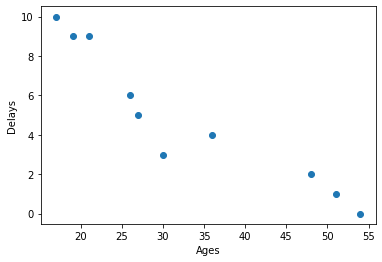

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [3]:
# Your code here.

X = student_data['X']
Y = student_data['Y']

plt.scatter(X,Y)
plt.xlabel('Ages')
plt.ylabel('Delays')
plt.show()
plt

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 
'''
Definitely. You can clearly see delays decreasing as age increase.
They are almost perfectly negatively correlated
'''

'\nDefinitely. You can clearly see delays decreasing as age increase.\nThey are almost perfectly negatively correlated\n'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
#correlation:
student_data[['X','Y']].corr()

,X,Y
X,1.000000,-0.939163
Y,-0.939163,1.000000


In [6]:
#covariance:
student_data[['X','Y']].cov()

,X,Y
X,187.655556,-45.566667
Y,-45.566667,12.544444


In [7]:
'''
From Medium:

 “Covariance” indicates the direction of the linear relationship between variables. 
 “Correlation” on the other hand measures both the strength and direction of the linear relationship 
 between two variables. Correlation is a function of the covariance. What sets them apart is the fact that 
 correlation values are standardized whereas (-1 to 1), covariance values are not. 
 
 "Correlation, statistical technique which determines how one variables moves/changes in 
 relation with the other variable."
 
 From the correlation: it is almost one so we can safely say they are correlated.
 the negativity indicates that while one rises, the other variable decreases. 
'''

'\nFrom Medium:\n\n “Covariance” indicates the direction of the linear relationship between variables. \n “Correlation” on the other hand measures both the strength and direction of the linear relationship \n between two variables. Correlation is a function of the covariance. What sets them apart is the fact that \n correlation values are standardized whereas (-1 to 1), covariance values are not. \n \n "Correlation, statistical technique which determines how one variables moves/changes in \n relation with the other variable."\n \n From the correlation: it is almost one so we can safely say they are correlated.\n the negativity indicates that while one rises, the other variable decreases. \n'

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [8]:
# Your response here.
'''
linear regression!
outcome variable is the Y values, number of tardies/delays. or... is it the ages?
I mean, given Y I can also take X (ages)... help here please!
'''

slope, intercept, r_value, _, std_err = stats.linregress(X, Y)
stats.linregress(X,Y)

LinregressResult(slope=-0.24282077091598084, intercept=12.88880336313577, rvalue=-0.9391626886887123, pvalue=5.56665383455336e-05, stderr=0.03139728816158602)

Plot your regression model on your scatter plot.

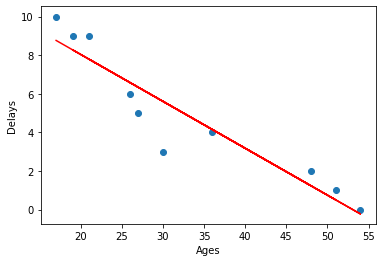

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [9]:
# Your code here.
plt.scatter(X,Y)
plt.plot(X, slope*X + intercept, color='red')
plt.xlabel('Ages')
plt.ylabel('Delays')
plt.show()
plt

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [10]:
# Your response here. 
'''
From the scatter plot we can already see the tendency: that age is a good predictor of tardiness.
This is later on confirmed by the correlation value.
Also, the p-value is very small, so we can reject the null hypothesis
(that is they don't correlate) - not sure about this
'''

"\nFrom the scatter plot we can already see the tendency: that age is a good predictor of tardiness.\nThis is later on confirmed by the correlation value.\nAlso, the p-value is very small, so we can reject the null hypothesis\n(that is they don't correlate) - not sure about this\n"

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [11]:
# Import any libraries you may need & the data
df = pd.read_csv('vehicles.csv')
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [12]:
print(df[['Year','CO2 Emission Grams/Mile']].corr())
print('\n')
print(df[['Cylinders','CO2 Emission Grams/Mile']].corr())
print('\n')
print(df[['Fuel Barrels/Year','CO2 Emission Grams/Mile']].corr())
print('\n')
print(df[['Combined MPG','CO2 Emission Grams/Mile']].corr())
print('\n')
print(df[['Fuel Cost/Year','CO2 Emission Grams/Mile']].corr())

                           Year  CO2 Emission Grams/Mile
Year                     1.0000                  -0.2223
CO2 Emission Grams/Mile -0.2223                   1.0000


                         Cylinders  CO2 Emission Grams/Mile
Cylinders                 1.000000                 0.752393
CO2 Emission Grams/Mile   0.752393                 1.000000


                         Fuel Barrels/Year  CO2 Emission Grams/Mile
Fuel Barrels/Year                 1.000000                 0.986189
CO2 Emission Grams/Mile           0.986189                 1.000000


                         Combined MPG  CO2 Emission Grams/Mile
Combined MPG                 1.000000                -0.926229
CO2 Emission Grams/Mile     -0.926229                 1.000000


                         Fuel Cost/Year  CO2 Emission Grams/Mile
Fuel Cost/Year                 1.000000                 0.930865
CO2 Emission Grams/Mile        0.930865                 1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [13]:
# Your response here. 

#see below

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

Text(0.5, 1.0, 'CO2 emissions vs. Fuel Cost/Year')

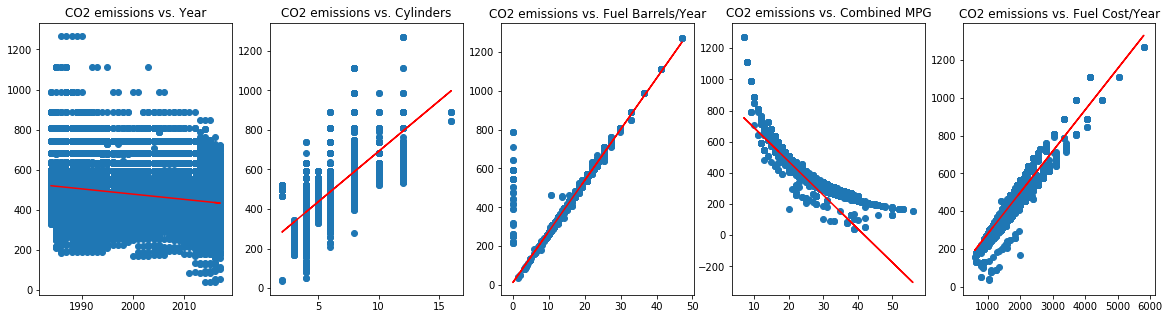

In [14]:
# Your response here. 

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20, 5))

#CO2 emissions vs. Year
Y = df['CO2 Emission Grams/Mile']
X = df['Year']
slope, intercept, r_value, _, std_err = stats.linregress(X, Y)
ax1.plot(X, slope*X + intercept, color='red')
ax1.scatter(X,Y)
ax1.set_title('CO2 emissions vs. Year')


#CO2 emissions vs. Cylinders
Y = df['CO2 Emission Grams/Mile']
X = df['Cylinders']
slope, intercept, r_value, _, std_err = stats.linregress(X, Y)
ax2.plot(X, slope*X + intercept, color='red')
ax2.scatter(X,Y)
ax2.set_title('CO2 emissions vs. Cylinders')


#CO2 emissions vs. Fuel Barrels/Year
Y = df['CO2 Emission Grams/Mile']
X = df['Fuel Barrels/Year']
slope, intercept, r_value, _, std_err = stats.linregress(X, Y)
ax3.plot(X, slope*X + intercept, color='red')
ax3.scatter(X,Y)
ax3.set_title('CO2 emissions vs. Fuel Barrels/Year')


#CO2 emissions vs. Combined MPG
Y = df['CO2 Emission Grams/Mile']
X = df['Combined MPG']
slope, intercept, r_value, _, std_err = stats.linregress(X, Y)
ax4.plot(X, slope*X + intercept, color='red')
ax4.scatter(X,Y)
ax4.set_title('CO2 emissions vs. Combined MPG')

#CO2 emissions vs. Fuel Cost/Year
Y = df['CO2 Emission Grams/Mile']
X = df['Fuel Cost/Year']
slope, intercept, r_value, _, std_err = stats.linregress(X, Y)
ax5.plot(X, slope*X + intercept, color='red')
ax5.scatter(X,Y)
ax5.set_title('CO2 emissions vs. Fuel Cost/Year')


In [15]:
'''
They all correlate (Year not so much). Linear regresson fits all except for COmbined MPG.
'''

'\nThey all correlate (Year not so much). Linear regresson fits all except for COmbined MPG.\n'

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [16]:
# Your code here.
party = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})
party.head()

X = party['X']
Y = party['Y']

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

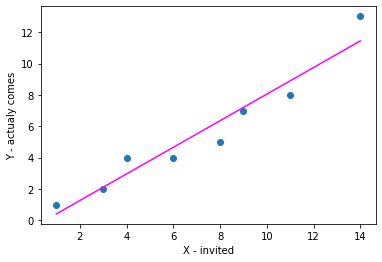

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [17]:
# Your code here.

slope, intercept, r_value, _, std_err = stats.linregress(X, Y)

plt.scatter(X,Y)
plt.plot(X, slope*X + intercept, color='magenta')
plt.xlabel('X - invited')
plt.ylabel('Y - actualy comes')
plt.show()
plt

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [18]:
# Your response here. 
party.corr()

#yep they correlate

,X,Y
X,1.00000,0.96523
Y,0.96523,1.00000


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [24]:
# Your response here. 

party_cut = party[party['X'] < 14]
party_cut

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


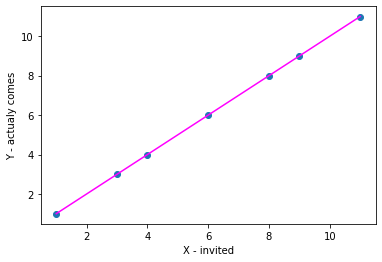

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [26]:
X_cut = party_cut['X']
Y_cut = party_cut['X']

slope, intercept, r_value, _, std_err = stats.linregress(X_cut, Y_cut)

plt.scatter(X_cut,Y_cut)
plt.plot(X_cut, slope*X_cut + intercept, color='magenta')
plt.xlabel('X - invited')
plt.ylabel('Y - actualy comes')
plt.show()
plt

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [27]:
# Your response here. 
'''
by removing the outlier, the model fits better.
'''

'\nby removing the outlier, the model fits better.\n'